### 1 Predicting Temperature

First, load the dataset from the weatherinszeged table from Thinkful's database.



In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weatherinszeged_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

weatherinszeged_df.info()
weatherinszeged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. 

In [7]:
#Taget variable of temperature
Y = weatherinszeged_df['temperature']

#feature set
X = weatherinszeged_df[['humidity', 'windspeed', 'windbearing', 'pressure']]

#Linear Regression Model
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

#results
print('Coefficients:\n', lrm.coef_)
print('\nIntercept:\n', lrm.intercept_)

Coefficients:
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept:
 37.926438185286


Estimate the model using OLS.

In [17]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:18:33   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

1. linearity of models in their coefficients


2. the error term should be zero on average

3. homoscedasticity

4. low multicollinearity

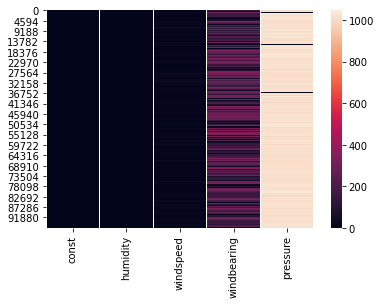

In [36]:
#heatmap
sns.heatmap(X)
plt.show()

5. error terms should be uncorrelated with one another


6. features shouldn't be correlated with the errors

7. normality of the errors

### 2 House Prices

Load the houseprices data from Thinkful's database.



In [19]:
postgres_user_housing = 'dsbc_student'
postgres_pw_housing = '7*.8G9QH21'
postgres_host_housing = '142.93.121.174'
postgres_port_housing = '5432'
postgres_db_housing = 'houseprices'

In [20]:
engine_housing = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user_housing, postgres_pw_housing, postgres_host_housing, postgres_port_housing, postgres_db_housing))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine_housing)

engine.dispose()

houseprices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


Reimplement the model you built in the previous checkpoint.


In [40]:
X_houseprice = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]
Y_houseprice = houseprices_df.saleprice

X_houseprice = sm.add_constant(X_houseprice)

results_houseprice = sm.OLS(Y_houseprice, X_houseprice).fit()

results_houseprice.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     926.5
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:56:39   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.907e+04   4638.450    -21.359      0.000   -1.08e+05      -9e+04
overallqual  2.364e+04   1072.532     22.037      0.000    2.15e+04    2.57e+04
grlivarea      45.3458      2.489     18.218      0.000      40.463      50.228
garagecars   1.454e+04   3022.681      4.812      0.000    8615.034    2.05e+04
garagearea     17.1334     10.468      1.637      0.102      -3.401      37.668
totalbsmtsf    31.5015      2.904     10.848      0.000      25.805      37.198
==============================================================================
Omnibus:                      438.146   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40648.199
Skew:                          -0.338   Prob(JB):                         0.00
Kurtosis:                      28.841   Cond. No.                     9.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
be sure to close the database connection after initially pulling in your data.

1. linearity of models in their coefficients


2. the error term should be zero on average

3. homoscedasticity

4. low multicollinearity

5. error terms should be uncorrelated with one another


6. features shouldn't be correlated with the errors

7. normality of the errors